
# Name :- Pralay K Kalaskar
# Contact :- +91-7066216365
# Mail :- pkkdkalaskar71@gmail.com
# Linkedin :- www.linkedin.com/in/pralay-kalaskar-1010

In [ ]:
# "Tab" = shows all the executable operation with the variable object
# "Lfet shift + Tab" = shows parameters inside that particular function
# "Right Ctrl + Enter" = keyboard shortcut for run In[] in python

# Importing the Dependencies

In [19]:
# Importing the libraries for use

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
# from sklearn import metrics
# from sklearn.metrics import recall_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Data Collection and Processing and EDA Part

In [20]:
# Loading the Dataset

data = pd.read_csv("Spotifyy.csv")
data # shows all records (number of rows and columns)
data.head() # starting 5 rows

,Index,Title,Artist,Top_Genre,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [21]:
type(data)

pandas.core.frame.DataFrame

In [22]:
data.size # all cells in sheet
print(type(data.size)) # shows datatype
data.shape # shows number of rows and columns in dimensions
print(data.shape)
data.describe() # gives the description of all data

<class 'numpy.int32'>
(1994, 15)


,Index,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


In [23]:
# full detailes like (count of non-null values and datatype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top_Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats_Per_Minute_(BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness_(dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length_(Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [24]:
# shows the count of all null values in CSV columns
data.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top_Genre                 0
Year                      0
Beats_Per_Minute_(BPM)    0
Energy                    0
Danceability              0
Loudness_(dB)             0
Liveness                  0
Valence                   0
Length_(Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

C:\Users\pralay kalaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


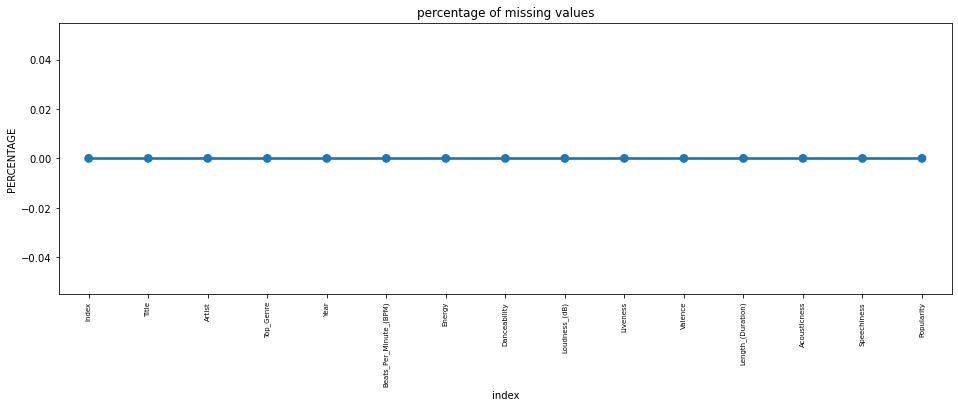

In [25]:
# shows the graph of missing values fron CSV in columwise
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [26]:
# just to verify that showing null values count is true.
# null in excel sheet = [N]+[O]+[Q]+[R]+[S]+[T]+[U]+[V]+[W]+[X]+[Y]+[Z]+[AK]+[AL] = (in[] write the column name)

data.loc[data['Beats_Per_Minute_(BPM)'].isnull() == True]

# you can change the name ('Avg _Monthly_Long_Distance_Charges') to ('columun names which are haning null values')

,Index,Title,Artist,Top_Genre,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity


In [27]:
# missing values in percentages
data.isnull().sum() * 100 / len(data)

Index                     0.0
Title                     0.0
Artist                    0.0
Top_Genre                 0.0
Year                      0.0
Beats_Per_Minute_(BPM)    0.0
Energy                    0.0
Danceability              0.0
Loudness_(dB)             0.0
Liveness                  0.0
Valence                   0.0
Length_(Duration)         0.0
Acousticness              0.0
Speechiness               0.0
Popularity                0.0
dtype: float64

In [28]:
# Missing values treatment
# removing missing values
# data.dropna(how = 'any', inplace = True)


# in this particular dataframe any column which will be having null values or NA values will be filled up with zero
# data.fillna(0) 

In [29]:
# for removing the whole column
# data.drop(columns = '','' axiss=1, inplace=True)

In [30]:
# printing the first 5 rows of the dataframe
data.head()

,Index,Title,Artist,Top_Genre,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [31]:
# number of rows and columns
data.shape

# will give you all the unique values in the column
#loan_dataset["column_name"].unique()

(1994, 15)

In [32]:
print("Numbers of rows :- ", data.shape[0])
print("Numbers of columns :- ", data.shape[1])

Numbers of rows :-  1994
Numbers of columns :-  15


In [33]:
# statistical measures
data.describe()

,Index,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


In [35]:
data.corr()

,Index,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
Index,1.000000,-0.607910,-0.048918,-0.114307,-0.047156,-0.260179,-0.027125,0.063304,0.024119,0.057346,-0.050991,0.087442
Year,-0.607910,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.050346,-0.132946,0.054097,-0.158962
Beats_Per_Minute_(BPM),-0.048918,0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,0.006252,-0.122472,0.085598,-0.003181
Energy,-0.114307,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,0.022800,-0.665156,0.205865,0.103393
Danceability,-0.047156,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135432,-0.135769,0.125229,0.144344
Loudness_(dB),-0.260179,0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.056127,-0.451635,0.125090,0.165527
Liveness,-0.027125,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,0.032499,-0.046206,0.092594,-0.111978
Valence,0.063304,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.203690,-0.239729,0.107102,0.095911
Length_(Duration),0.024119,-0.050346,0.006252,0.022800,-0.135432,-0.056127,0.032499,-0.203690,1.000000,-0.102319,-0.027826,-0.065403
Acousticness,0.057346,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,-0.102319,1.000000,-0.098256,-0.087604


In [36]:
data

,Index,Title,Artist,Top_Genre,Year,Beats_Per_Minute_(BPM),Energy,Danceability,Loudness_(dB),Liveness,Valence,Length_(Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [42]:
data.columns

Index(['Index', 'Title', 'Artist', 'Top_Genre', 'Year',
       'Beats_Per_Minute_(BPM)', 'Energy', 'Danceability', 'Loudness_(dB)',
       'Liveness', 'Valence', 'Length_(Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')

In [46]:
len(data.columns)

15

In [47]:
# column names
data['Top_Genre'].unique()
# you can use various columns names

array(['adult standards', 'album rock', 'alternative hip hop',
       'alternative metal', 'classic rock', 'alternative pop rock', 'pop',
       'modern rock', 'detroit hip hop', 'alternative rock',
       'dutch indie', 'garage rock', 'dutch cabaret', 'permanent wave',
       'classic uk pop', 'dance pop', 'modern folk rock', 'dutch pop',
       'dutch americana', 'alternative dance', 'german pop', 'afropop',
       'british soul', 'irish rock', 'disco', 'big room', 'art rock',
       'danish pop rock', 'neo mellow', 'britpop', 'boy band',
       'carnaval limburg', 'arkansas country', 'latin alternative',
       'british folk', 'celtic', 'chanson', 'celtic rock', 'hip pop',
       'east coast hip hop', 'dutch rock', 'blues rock', 'electro',
       'australian pop', 'belgian rock', 'downtempo', 'reggae fusion',
       'british invasion', 'finnish metal', 'canadian pop', 'bow pop',
       'dutch hip hop', 'dutch metal', 'soft rock', 'acoustic pop',
       'acid jazz', 'dutch prog', 'ca

In [64]:
# column count values
data['Top_Genre'].value_counts()
# you can use various columns names

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top_Genre, Length: 149, dtype: int64

# data-visualization

In [86]:
# top five genres by Popularity and plot a barplot
top_five_popular_songs = data[["Popularity", "Top_Genre","Title", "Artist", "Year"]].sort_values(by="Popularity", ascending=False)[:5]
top_five_popular_songs
# you can add the columns name into "" to represent the column in view

,Popularity,Top_Genre,Title,Artist,Year
793,100,australian pop,Dance Monkey,Tones and I,2019
787,98,pop,Memories,Maroon 5,2019
786,95,electropop,bad guy,Billie Eilish,2019
1641,95,dance pop,All I Want for Christmas Is You,Mariah Carey,1994
688,88,modern rock,Believer,Imagine Dragons,2017


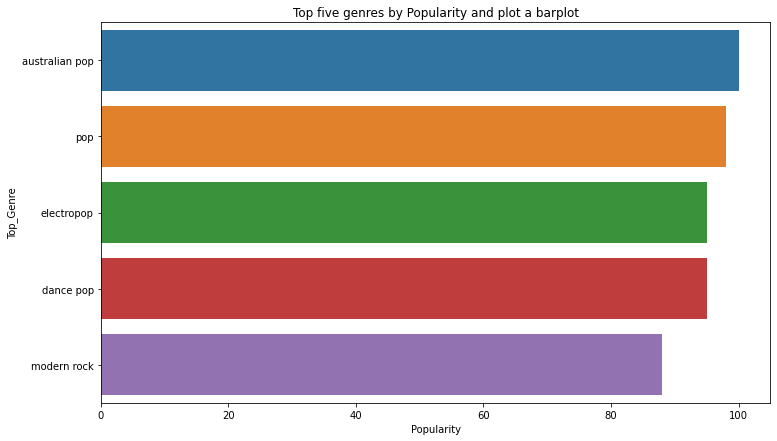

In [88]:
plt.figure(figsize=(12, 7))
sns.barplot(x = "Popularity", y = "Top_Genre", data = top_five_popular_songs)
plt.title("Top five genres by Popularity and plot a barplot")
plt.show()

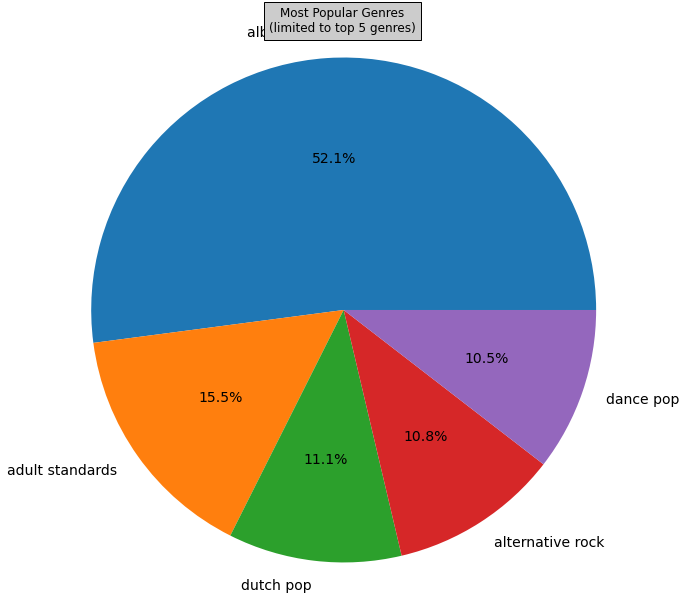

In [98]:
# Find percent of each genre
df_genre = data['Top_Genre'].value_counts()[:5].sort_values(ascending=False) / len(data)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()
# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.title("Most Popular Genres\n" + "(limited to top 5 genres)", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

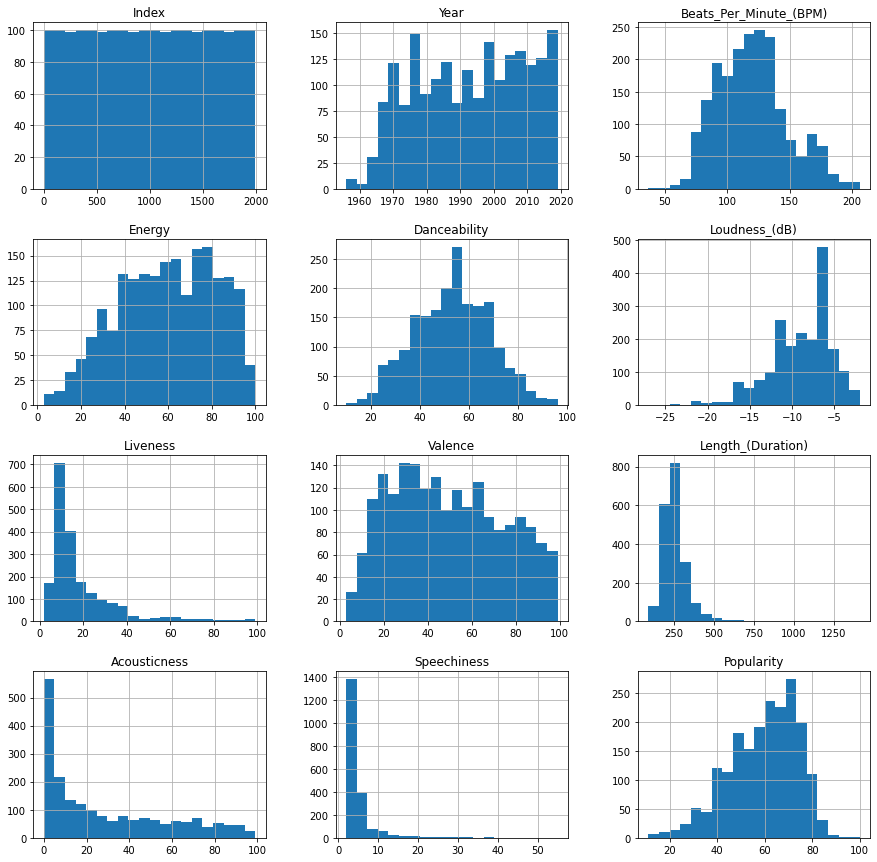

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
data.hist(bins=20, figsize=(15,15))
plt.show()

<Figure size 936x1224 with 0 Axes>

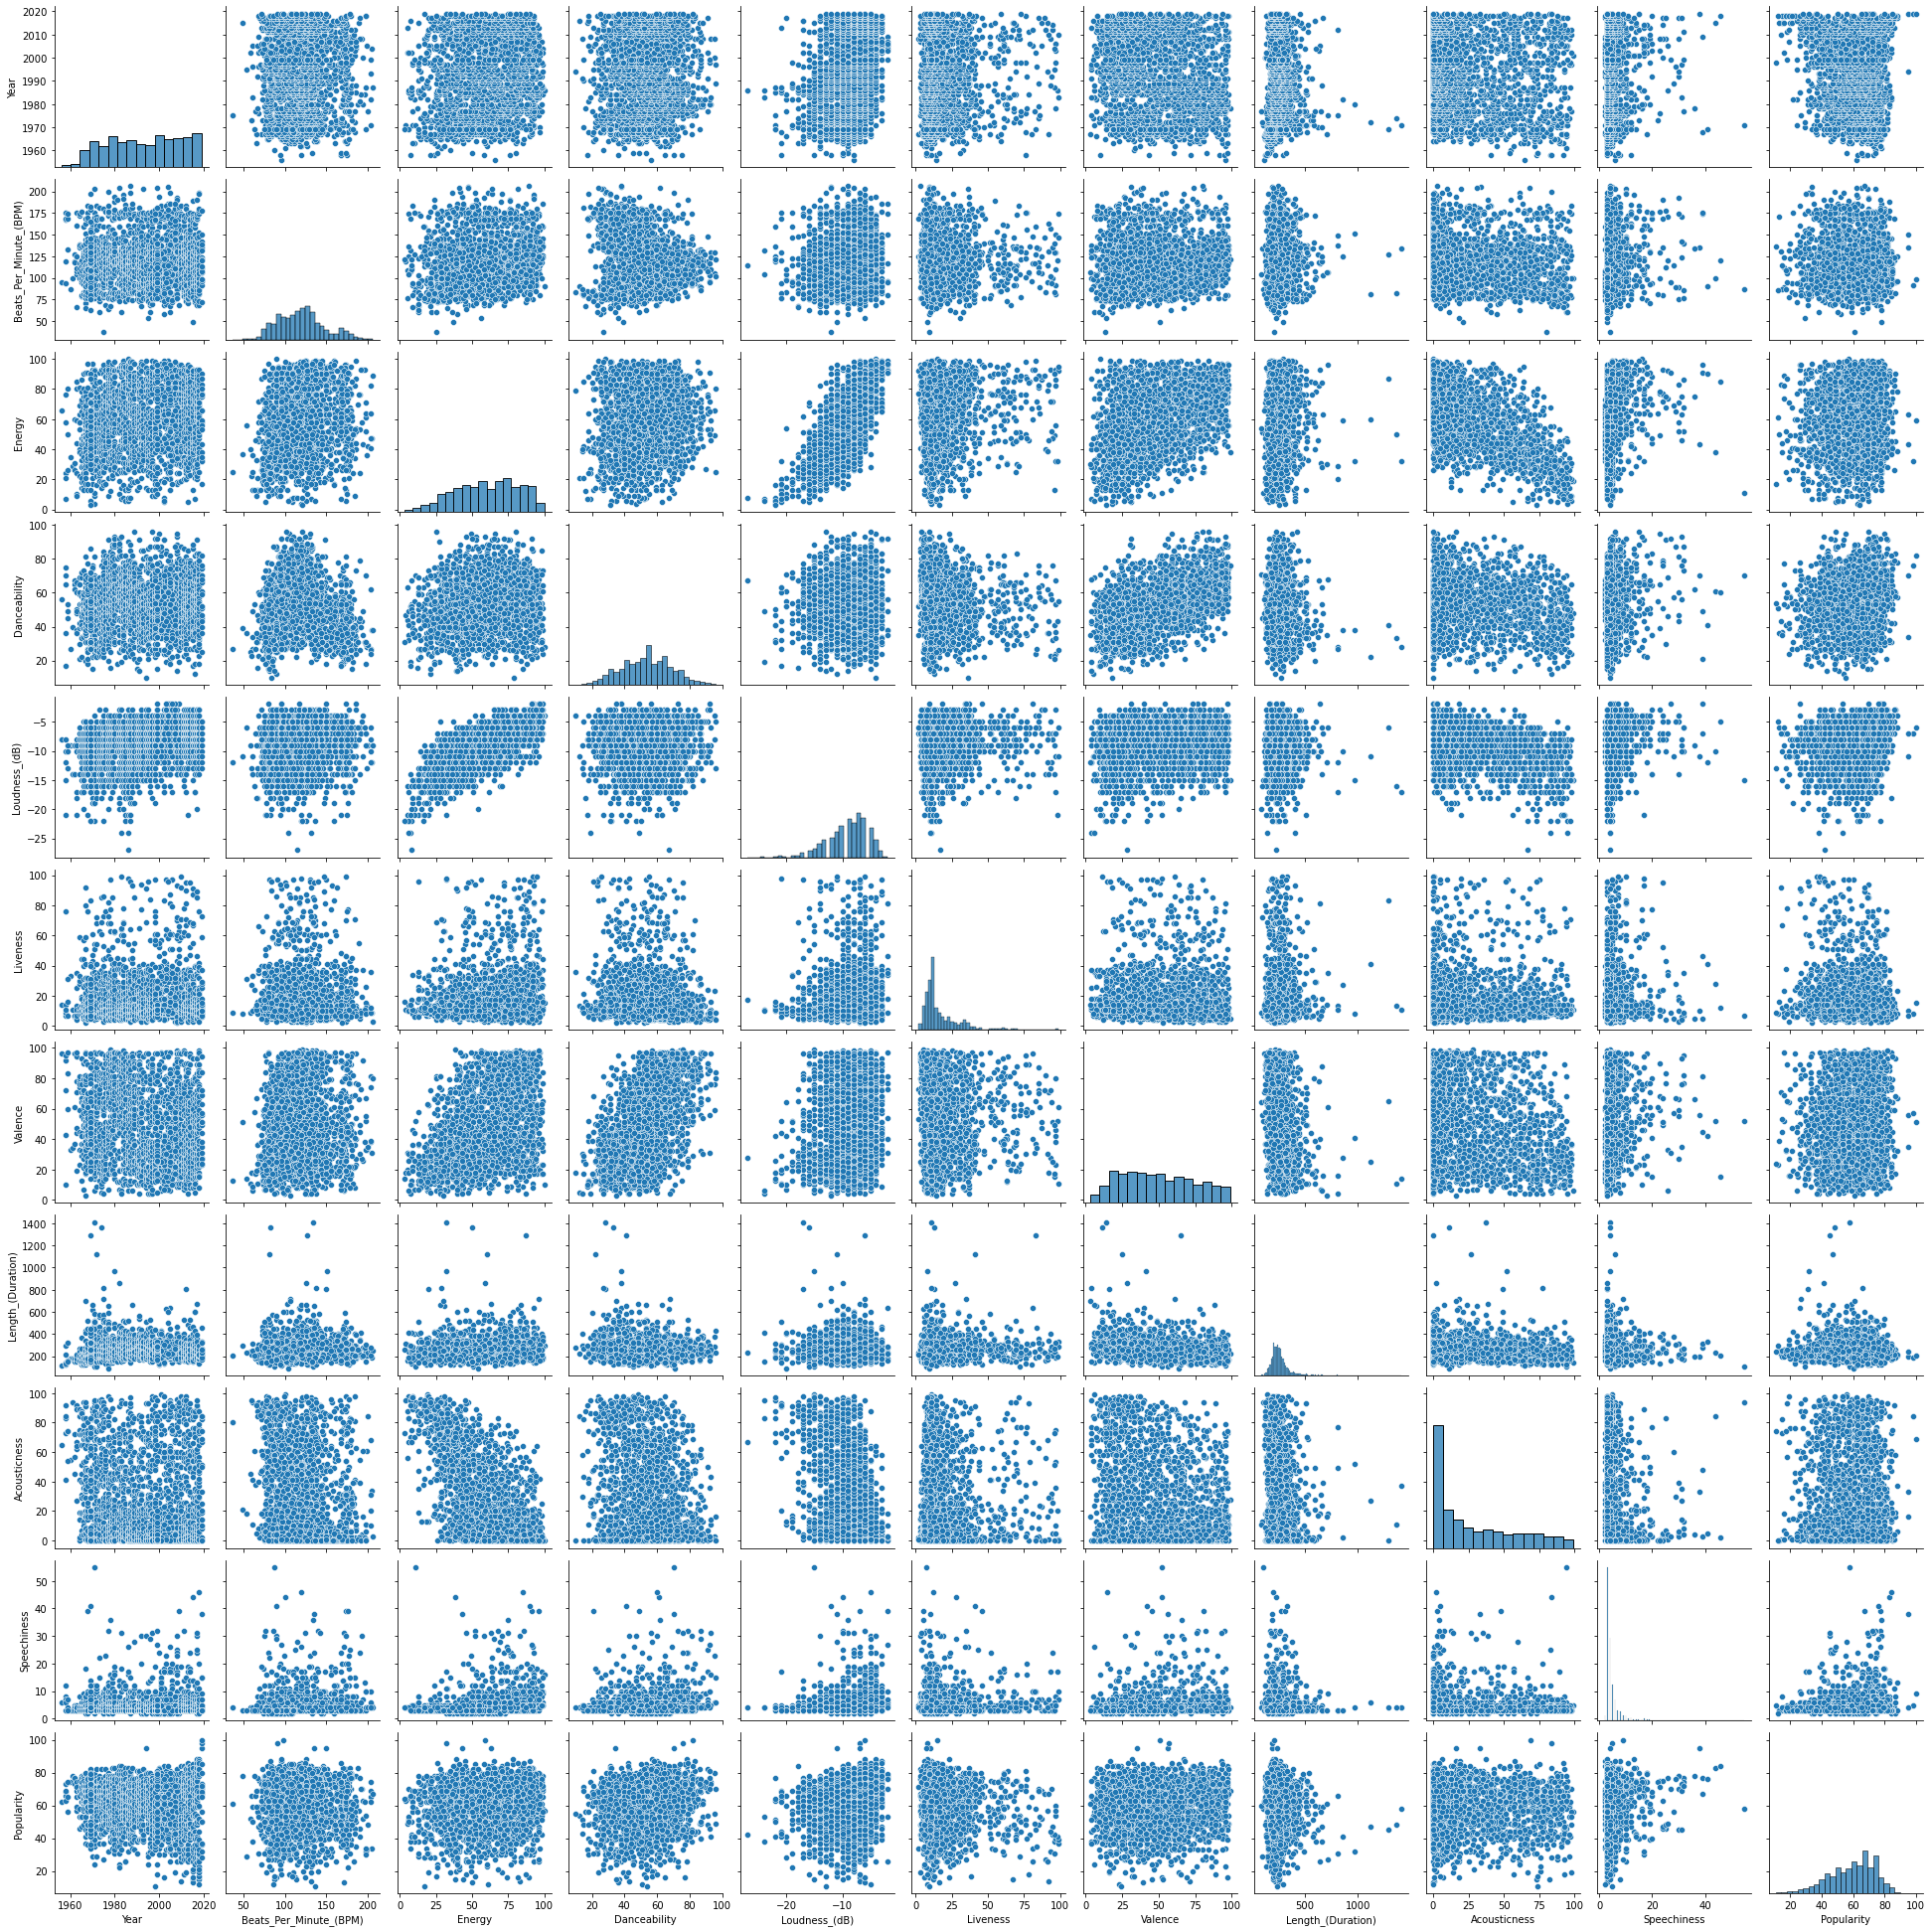

In [100]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Index'],axis=1))
plt.show()

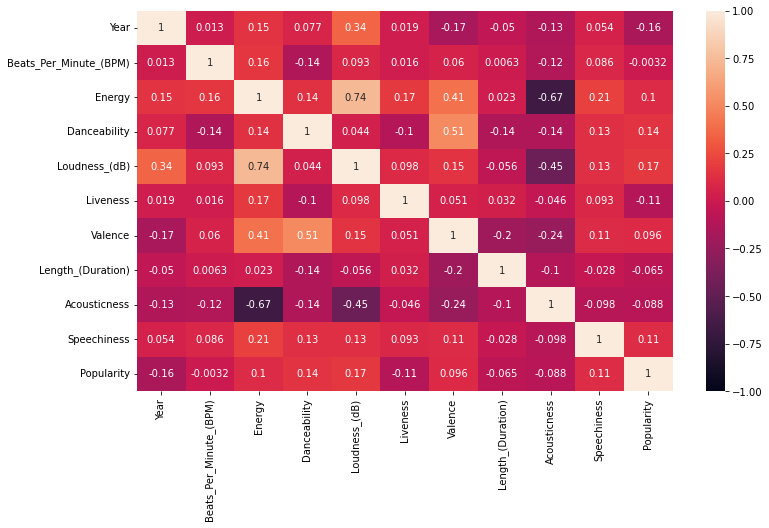

In [101]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Index'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()